In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [8]:
# Реализация сети RBF для кластеризации данных
class RBFNetworkClustering:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate, epochs):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.centers = [np.random.uniform(-1, 1, input_dim) for _ in range(hidden_dim)]
        self.width = np.mean(
            [np.linalg.norm(self.centers[i] - self.centers[j]) for i in range(hidden_dim) for j in range(hidden_dim)])

        self.weights = np.random.random((hidden_dim, output_dim))

    def radial_basis_function(self, x, c, width):
        return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * width ** 2))

    def hidden_layer_output(self, X):
        G = np.zeros((X.shape[0], self.hidden_dim), float)
        for i in range(X.shape[0]):
            for j in range(self.hidden_dim):
                G[i, j] = self.radial_basis_function(X[i], self.centers[j], self.width)
        return G

    def train(self, X):
        for epoch in range(self.epochs):
            G = self.hidden_layer_output(X)
            self.weights = np.dot(np.linalg.pinv(G), X)

    def predict(self, X):
        G = self.hidden_layer_output(X)
        return np.dot(G, self.weights)

In [9]:
data = np.random.rand(100, 2)
data

array([[0.44258447, 0.23928181],
       [0.38773267, 0.97694845],
       [0.3051942 , 0.73650322],
       [0.19932421, 0.51963229],
       [0.48300003, 0.45148019],
       [0.62022792, 0.20242499],
       [0.85800745, 0.43830576],
       [0.83558283, 0.31632974],
       [0.58983551, 0.66459923],
       [0.99044456, 0.8002656 ],
       [0.75168438, 0.65279668],
       [0.52492279, 0.97878456],
       [0.71710169, 0.94363065],
       [0.77091467, 0.80914451],
       [0.46579387, 0.398125  ],
       [0.19134665, 0.48121801],
       [0.34059673, 0.89104621],
       [0.74405908, 0.99835326],
       [0.7465076 , 0.41072056],
       [0.90951068, 0.00266431],
       [0.60446616, 0.13605474],
       [0.56032682, 0.32352803],
       [0.97742886, 0.21413136],
       [0.68711065, 0.97994021],
       [0.73179064, 0.38110954],
       [0.34863091, 0.1314946 ],
       [0.71956048, 0.13023694],
       [0.6444545 , 0.02376673],
       [0.43684006, 0.23889482],
       [0.88402649, 0.84813326],
       [0.

In [10]:
rbf_network = RBFNetworkClustering(input_dim=2, hidden_dim=5, output_dim=2, learning_rate=0.1, epochs=100)
rbf_network.train(data)

In [11]:
clusters = rbf_network.predict(data)
print("Clusters:", clusters)

Clusters: [[ 0.49680905  0.20599235]
 [ 0.35470497  0.99724375]
 [ 0.30549936  0.74591083]
 [ 0.19693807  0.50624579]
 [ 0.57264414  0.44417935]
 [ 0.62932083  0.18740223]
 [ 0.83291632  0.44820704]
 [ 0.78060912  0.32808399]
 [ 0.68954677  0.69188432]
 [ 0.90998156  0.73688011]
 [ 0.82334553  0.67239376]
 [ 0.54640955  1.00407497]
 [ 0.76058863  0.94567667]
 [ 0.82841637  0.8190108 ]
 [ 0.54870362  0.38224093]
 [ 0.19301734  0.46691349]
 [ 0.31271303  0.91068552]
 [ 0.76510108  0.97795379]
 [ 0.77880462  0.41963982]
 [ 0.62271264  0.06056307]
 [ 0.59126396  0.11774762]
 [ 0.62510219  0.30857239]
 [ 0.75071286  0.24265483]
 [ 0.72359155  0.98131155]
 [ 0.7618093   0.38766042]
 [ 0.38030864  0.09324467]
 [ 0.64972478  0.13235929]
 [ 0.55948429  0.01790075]
 [ 0.49114491  0.20522619]
 [ 0.88060217  0.81657255]
 [-0.01312946  0.7820854 ]
 [ 0.56672904  0.36748342]
 [ 0.65603427  0.11624596]
 [ 0.81696434  0.59775826]
 [ 0.43484532  0.71316593]
 [ 0.54883206  0.10645502]
 [ 0.72886634  0.5

In [22]:
color_clusters = []
for i in clusters:
    if i[0] > i[1]:
        color_clusters.append('blue')
    else:
        color_clusters.append('red')
color_clusters

['blue',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue']

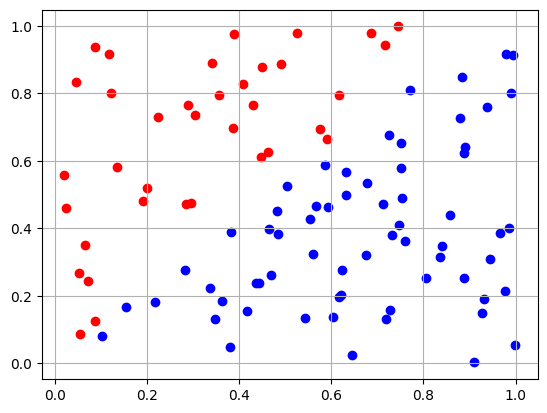

In [32]:
plt.figure()
for i, ii in enumerate(data):
    plt.scatter(x=ii[0], y=ii[1], color=f'{color_clusters[i]}')
plt.grid()
plt.show()